In [108]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
import math as mt
import csv
import numpy as np

from scipy.sparse import csc_matrix #used for sparse matrix
from scipy.sparse.linalg import * #used for matrix multiplication
from sparsesvd import sparsesvd #used for matrix factorization
from pylab import *
from sklearn.cross_validation import train_test_split
#imports for the project

In [109]:
df = pd.read_csv('C:/workfiles/recommendm/train/problem_data.csv')
df2 =pd.read_csv('C:/workfiles/recommendm/train/train_submissions.csv')
df3 =pd.read_csv('C:/workfiles/recommendm/train/user_data.csv')
#reading in all three files for the cleaning

In [110]:
df.head()
#Looking at dataframe head of the first file

,problem_id,level_type,points,tags
0,prob_3649,H,NaN,NaN
1,prob_6191,A,NaN,NaN
2,prob_2020,F,NaN,NaN
3,prob_313,A,500.0,"greedy,implementation"
4,prob_101,A,500.0,"constructive algorithms,greedy,math"


In [111]:
df = df.drop(['tags'], axis=1)
#getting rid of tags column due to it having a large number of NAs and no value for the recommendation engine

In [112]:
df.isnull().sum(axis=0)
#counting the number of NAs in the current dataframe

problem_id       0
level_type     133
points        3917
dtype: int64

In [113]:
df.dtypes
#looking at the data types 

problem_id     object
level_type     object
points        float64
dtype: object

In [114]:
df.groupby(["level_type"]).count().sort_values(["points"], ascending=False)
#looking at the points awarded to the questions the level type is from A-M A being the easiest M being the hardest, there is 
#little to no logic on the points system

,problem_id,points
level_type,,
B,1017,581
A,1042,561
C,915,500
D,850,441
E,795,414
F,421,69
G,328,23
H,272,3
I,256,0


In [115]:
count = df.groupby(['level_type', 'points']).size() 
print(count) 
#based off of the dispersion of points im going to go incrementally by 500 i.e. starting with 500 as level A 
#and ending with 6500 as level M 
#noted one question with level type B has -1 points...

level_type  points 
A            3.0         2
             10.0        1
             250.0      10
             500.0     521
             750.0       9
             1000.0     14
             1500.0      1
             1750.0      1
             3000.0      2
B           -1.0         1
             5.0         1
             10.0        1
             250.0       1
             500.0      33
             750.0      21
             1000.0    483
             1250.0     15
             1500.0     19
             1750.0      1
             2000.0      1
             2500.0      1
             3000.0      3
C            8.0         1
             250.0       1
             500.0       1
             750.0       2
             1000.0     37
             1250.0     22
             1500.0    375
             1750.0     24
                      ... 
E            500.0       2
             750.0       1
             1000.0      2
             1500.0      3
             1750.0      2
        

In [116]:
df1 = df

df1.loc[df1.level_type == 'A', 'points'] = 500
df1.loc[df1.level_type == 'B', 'points'] = 1000
df1.loc[df1.level_type == 'C', 'points'] = 1500
df1.loc[df1.level_type == 'D', 'points'] = 2000
df1.loc[df1.level_type == 'E', 'points'] = 2500
df1.loc[df1.level_type == 'F', 'points'] = 3000
df1.loc[df1.level_type == 'G', 'points'] = 3500
df1.loc[df1.level_type == 'H', 'points'] = 4000
df1.loc[df1.level_type == 'I', 'points'] = 4500
df1.loc[df1.level_type == 'J', 'points'] = 5000
df1.loc[df1.level_type == 'K', 'points'] = 5500
df1.loc[df1.level_type == 'L', 'points'] = 6000
df1.loc[df1.level_type == 'M', 'points'] = 6500
#if level type is as indicated then the points will be changed to the right side

In [117]:
df1.isnull().sum(axis=0)
#current missing values after points given based off of level

problem_id      0
level_type    133
points        108
dtype: int64

In [118]:
df1.loc[df1.points == 500, 'level_type'] ='A'
df1.loc[df1.points == 1000, 'level_type'] ='B'
df1.loc[df1.points == 1500, 'level_type'] ='C'
df1.loc[df1.points == 2000, 'level_type'] ='D'
df1.loc[df1.points == 2500, 'level_type'] ='E'
df1.loc[df1.points == 3000, 'level_type'] ='F'
df1.loc[df1.points == 3500, 'level_type'] ='G'
df1.loc[df1.points == 4000, 'level_type'] ='H'
df1.loc[df1.points == 4500, 'level_type'] ='I'
df1.loc[df1.points == 5000, 'level_type'] ='J'
df1.loc[df1.points == 5500, 'level_type'] ='K'
df1.loc[df1.points == 6000, 'level_type'] ='L'
df1.loc[df1.points == 6500, 'level_type'] ='M'
#level type given based off of point value

In [119]:
df1.isnull().sum(axis=0)
#looks like the logic worked for most of the NAs now to deal with the NAs for the rows that have neither level nor point value

problem_id      0
level_type    126
points        108
dtype: int64

In [120]:
df1.head()

,problem_id,level_type,points
0,prob_3649,H,4000.0
1,prob_6191,A,500.0
2,prob_2020,F,3000.0
3,prob_313,A,500.0
4,prob_101,A,500.0


In [121]:
#df1.to_csv(r'C:\workfiles\recommendm\halfclean.csv')
#this is the command i used to send the cleaned df as csv to my computer

In [122]:
df1 = df1.dropna(thresh=3)
#if the row doesnt have 3 values then it will be dropped 

In [123]:
df1.isnull().sum(axis=0)
#make sure all NAs are taken care of

problem_id    0
level_type    0
points        0
dtype: int64

In [124]:
df1.head()
#make sure nothing looks odd

,problem_id,level_type,points
0,prob_3649,H,4000.0
1,prob_6191,A,500.0
2,prob_2020,F,3000.0
3,prob_313,A,500.0
4,prob_101,A,500.0


In [125]:
#df.count
#[6544 rows x 3 columns]>
#current demensions before cleaning

In [126]:
#df1.count
#[6408 rows x 3 columns]>
#after cleaning demensions

In [127]:
#df1.to_csv(r'C:\workfiles\recommendm\halfclean1.csv')

In [128]:
6544 - 6408
#total number of rows that were dropped

136

In [129]:
df4 = pd.merge(df1, df2, on='problem_id', how='inner')
#now to do an inner merge of with the user id and attemps range based off of problem id

In [130]:
df4.head()

,problem_id,level_type,points,user_id,attempts_range
0,prob_3649,H,4000.0,user_3434,1
1,prob_3649,H,4000.0,user_259,2
2,prob_3649,H,4000.0,user_2818,2
3,prob_6191,A,500.0,user_2464,1
4,prob_6191,A,500.0,user_2986,1


In [131]:
#df4.count
#[154726 rows x 5 columns]>
#the size of the dataframe grew very fast

In [132]:
df5 = pd.merge(df3, df4, on='user_id', how='inner')
#now to add the last file given in the merge, which will do an inner join based off of user id and will give information about 
#the users

In [133]:
df5.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,problem_id,level_type,points,attempts_range
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_75,A,500.0,1
1,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_3508,A,500.0,1
2,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_6362,D,2000.0,2
3,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_1308,C,1500.0,1
4,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_1481,B,1000.0,1


In [134]:
df5.isnull().sum(axis=0)
#data is oddly very clean except for country which will just be dropped

user_id                          0
submission_count                 0
problem_solved                   0
contribution                     0
country                      37762
follower_count                   0
last_online_time_seconds         0
max_rating                       0
rating                           0
rank                             0
registration_time_seconds        0
problem_id                       0
level_type                       0
points                           0
attempts_range                   0
dtype: int64

In [135]:
df5 = df5.drop(['country'], axis=1)
#country column dropped

In [136]:
df5.head()

,user_id,submission_count,problem_solved,contribution,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,problem_id,level_type,points,attempts_range
0,user_3311,47,40,0,4,1504111645,348.337,330.849,intermediate,1466686436,prob_75,A,500.0,1
1,user_3311,47,40,0,4,1504111645,348.337,330.849,intermediate,1466686436,prob_3508,A,500.0,1
2,user_3311,47,40,0,4,1504111645,348.337,330.849,intermediate,1466686436,prob_6362,D,2000.0,2
3,user_3311,47,40,0,4,1504111645,348.337,330.849,intermediate,1466686436,prob_1308,C,1500.0,1
4,user_3311,47,40,0,4,1504111645,348.337,330.849,intermediate,1466686436,prob_1481,B,1000.0,1


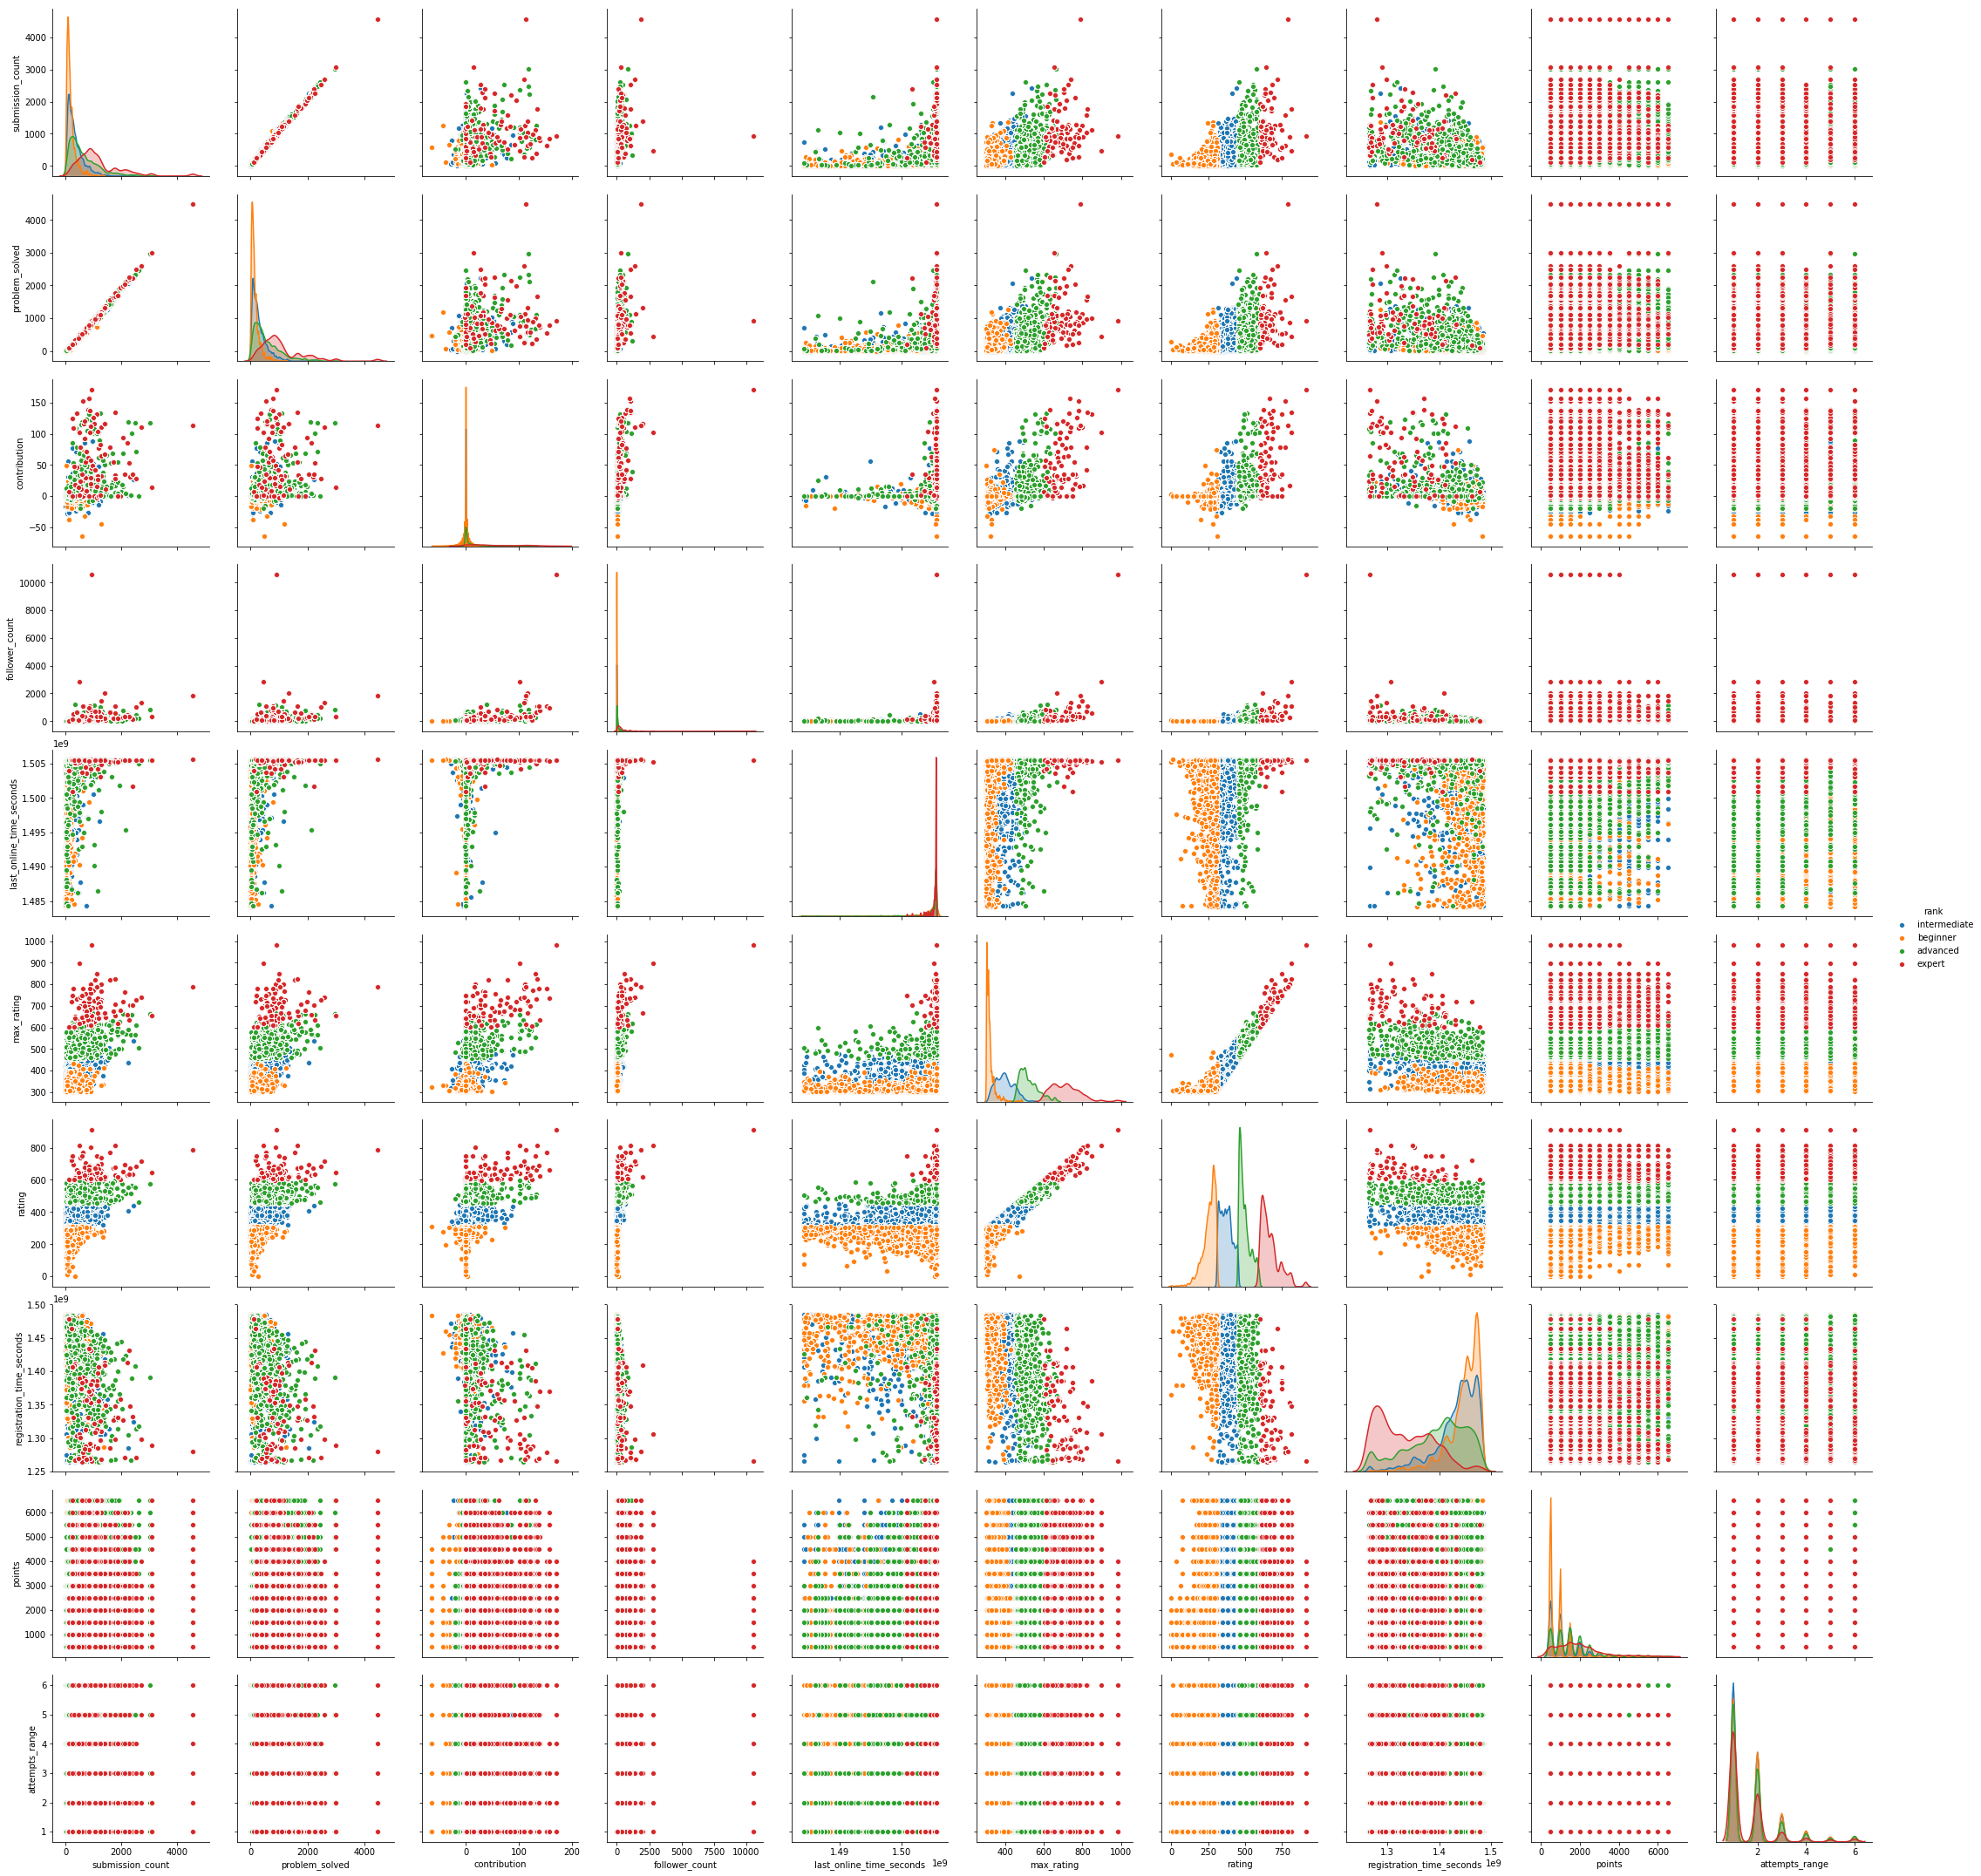

In [137]:
plt.figure()
sns.pairplot(df5.drop(['user_id','problem_id'], axis=1), hue = "rank", height=3)
plt.show()
#Here I use the pairplot to establish what kinds of relationships can be seen in the data with the coloration based off of 
#rank of the users 
#as expected there is a fairly distinguishable groupings in most plots based off of user rank 

c:\python\python36-32\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\python\python36-32\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


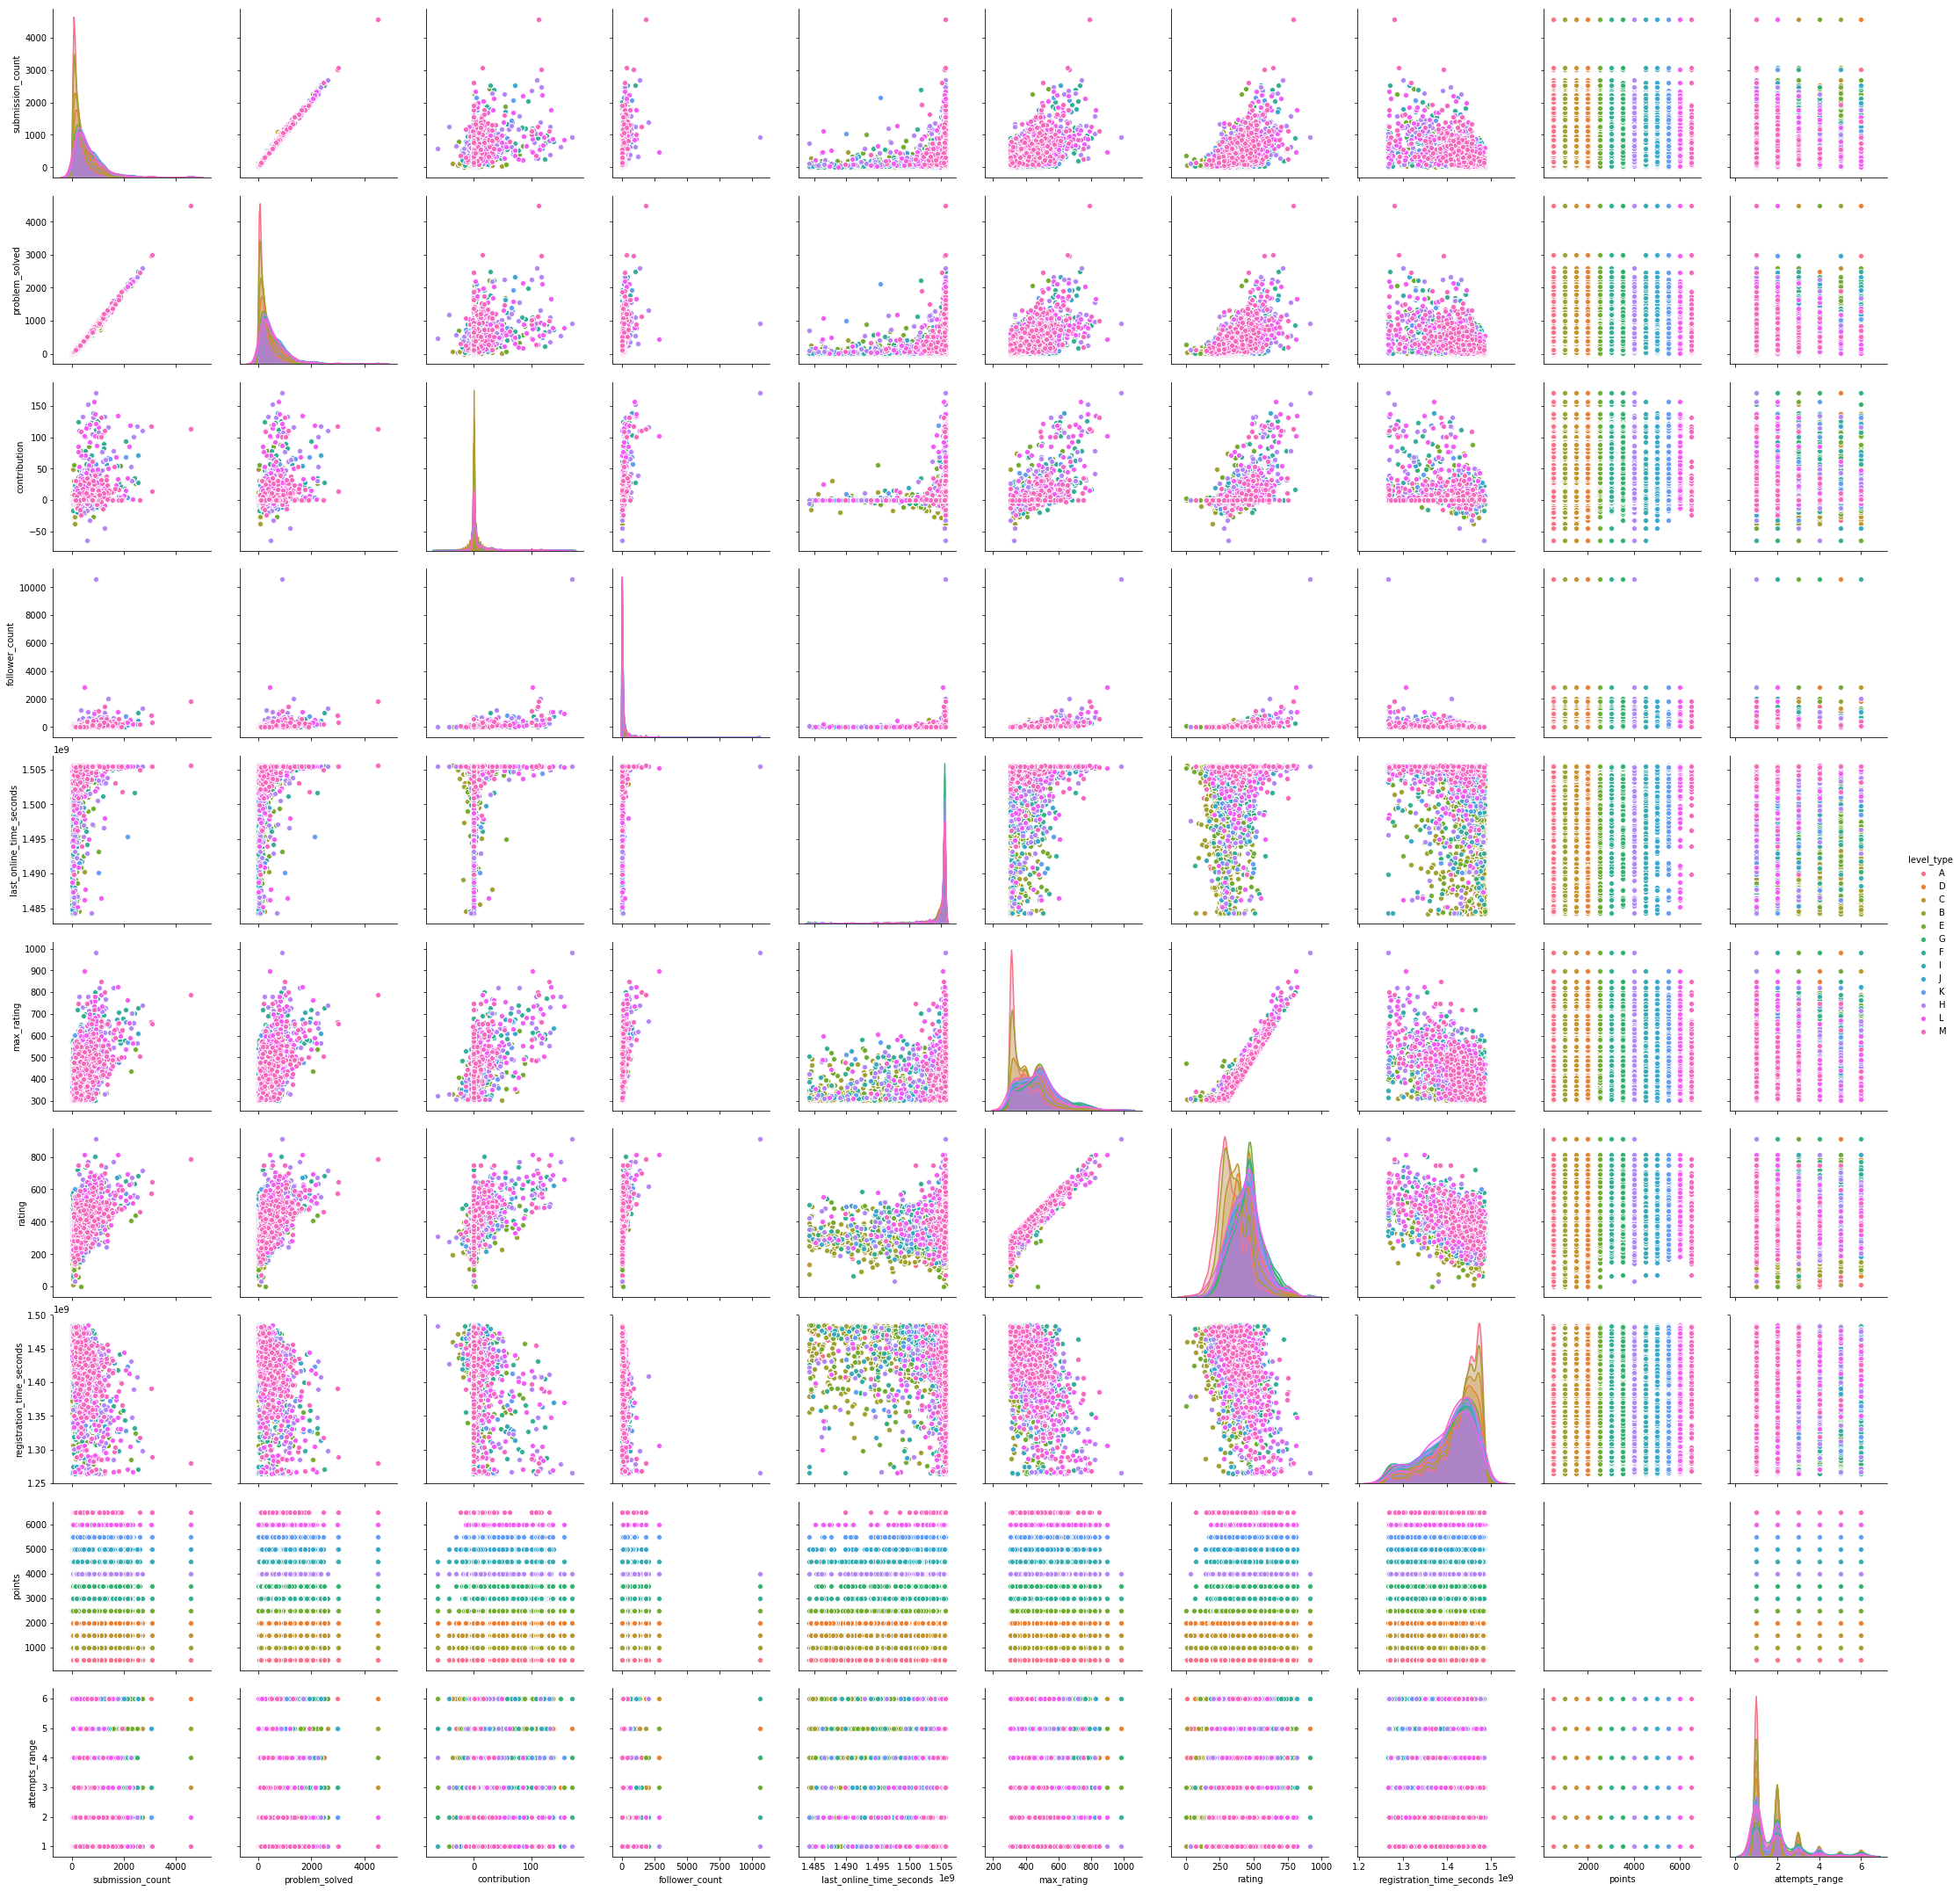

In [138]:
plt.figure()
sns.pairplot(df5.drop(['user_id','problem_id'], axis=1), hue = "level_type", height=3)
plt.show()
#based off of the plot of level type it seems that it is not as distinguisable as is user level but there is still some
#interesting correlations between values that can be used for discerning relationships

In [139]:
#df5.to_csv(r'C:\workfiles\recommendm\cleanrecomdsys.csv')

In [140]:
df5.dtypes
#looking over the data types for the main df

user_id                       object
submission_count               int64
problem_solved                 int64
contribution                   int64
follower_count                 int64
last_online_time_seconds       int64
max_rating                   float64
rating                       float64
rank                          object
registration_time_seconds      int64
problem_id                    object
level_type                    object
points                       float64
attempts_range                 int64
dtype: object

In [141]:
users = df5['user_id'].unique()
len(users) 
# return 3529 unique users
#number of users in df

3529

In [142]:
questions = df5['problem_id'].unique()
len(questions) 
# return 5667 unique questions

5667

In [143]:
#df5.count
#[154726 rows x 14 columns]>
#final demensions of df that is cleaned

In [144]:
#This class was provided by the below sources for a more customizable option for creating a Recommender engine based off of 
#popularity. 

#Raval, S. (2017, February 8). Building a song recommender. 
    #Retrieved from https://github.com/llSourcell/recommender_live/blob/master/Song%20Recommender_Python.ipynb.
    
#Le, E. (2017, April 23). How to build a simple song recommender system. 
    #Retrieved from https://towardsdatascience.com/how-to-build-a-simple-song-recommender-296fcbc8c85.
    
#Jain, A. (2016, June 2). Quick Guide to Build a Recommendation Engine in Python & R. 
    #Retrieved from https://www.analyticsvidhya.com/blog/2016/06/quick-guide-build-recommendation-engine-python/.


#creating a class called popularity recommender
class Popularity_Recommender():

# Initialize all the variables
    def __init__(self):
        # taking in training data.
        self.train_data = None

        # the user id for creating recommendations for
        self.user_id = None

        # The question id that is being fed to the recommender 
        self.problem_id = None

        # The final result which is returned as a dataframe 
        self.popularity_recommendations = None

    # defining the create function of the popularity_recommender class
    def create(self,train_data,user_id,problem_id):

        # assigning the training data
        self.train_data = train_data

        # assigning user id
        self.user_id = user_id

        # assigning question id
        self.problem_id = problem_id


        # The questions are grouped by problem_id, from which they are aggregated with the count of the 
        #users which resets the index.
        train_data_grouped = train_data.groupby([self.problem_id]).agg({self.user_id: 'count'}).reset_index()
        # The column named user_id is replaced by the name score.
        train_data_grouped.rename(columns = {'user_id': 'score'}, inplace = True)


        # The training data is sorted according to the score in descending order and by problem_id in ascending order.
        train_data_sort = train_data_grouped.sort_values(['score', self.problem_id], ascending = [0,1])
        # The new column named Rank is created by score sorted in ascending order.
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending = 0, method = 'first')


         # The first 15 items are returned by popularity_recommendations 
        self.popularity_recommendations = train_data_sort.head(15)


    # Method to user for creating recommendations
    def recommend(self, user_id):
#recommendations
         # Init the user_recommendation var by popularity_recommendations since the recommendations has been saved into this column.
        user_recommendation = self.popularity_recommendations

            # Get the user_id
        user_recommendation['user_id'] = user_id

            # Set the columns
        cols = user_recommendation.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendation = user_recommendation[cols]

        return user_recommendation

In [145]:
train_data, test_data = train_test_split(df5, test_size = 0.20, random_state=0)
#splitting the data into a train/test 80/20 split for establishing train/testing datasets

In [146]:
#set the popularity recommender func to pr
pr = Popularity_Recommender()
#use the create func within pr to assign data, user value, question value
pr.create(train_data, 'user_id', 'problem_id')

user_id = users[5]
pr.recommend(user_id)
# here we use the popularity model to create some predictions based off of user id 5

,user_id,problem_id,score,Rank
3746,user_2032,prob_5071,1100,1.0
612,user_2032,prob_1675,700,2.0
4395,user_2032,prob_5781,700,3.0
2145,user_2032,prob_334,573,4.0
1470,user_2032,prob_2605,509,5.0
334,user_2032,prob_137,478,6.0
4830,user_2032,prob_6266,470,7.0
566,user_2032,prob_1625,451,8.0
3872,user_2032,prob_5206,451,9.0
3886,user_2032,prob_522,440,10.0


In [147]:
pr.recommend(users[100])
#here I recommend soungs to the user in the 100 spot, its the exact same no matter which user

,user_id,problem_id,score,Rank
3746,user_1892,prob_5071,1100,1.0
612,user_1892,prob_1675,700,2.0
4395,user_1892,prob_5781,700,3.0
2145,user_1892,prob_334,573,4.0
1470,user_1892,prob_2605,509,5.0
334,user_1892,prob_137,478,6.0
4830,user_1892,prob_6266,470,7.0
566,user_1892,prob_1625,451,8.0
3872,user_1892,prob_5206,451,9.0
3886,user_1892,prob_522,440,10.0


In [148]:
df5.head()

,user_id,submission_count,problem_solved,contribution,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,problem_id,level_type,points,attempts_range
0,user_3311,47,40,0,4,1504111645,348.337,330.849,intermediate,1466686436,prob_75,A,500.0,1
1,user_3311,47,40,0,4,1504111645,348.337,330.849,intermediate,1466686436,prob_3508,A,500.0,1
2,user_3311,47,40,0,4,1504111645,348.337,330.849,intermediate,1466686436,prob_6362,D,2000.0,2
3,user_3311,47,40,0,4,1504111645,348.337,330.849,intermediate,1466686436,prob_1308,C,1500.0,1
4,user_3311,47,40,0,4,1504111645,348.337,330.849,intermediate,1466686436,prob_1481,B,1000.0,1


In [149]:
df6 = df5.drop(['user_id','rank','problem_id','level_type'], axis=1)
#creating a new dataframe which drops all string values

In [150]:
#df6.to_csv(r'C:\workfiles\recommendm\allnumeric.csv')
#sent to computer

In [151]:
df7 = df5[['attempts_range','problem_id','user_id']].pivot(index='user_id', columns='problem_id', values='attempts_range')
#here we grab the columns wanted for the pivot table and then assign accordingly to create the below output for the SVD model

In [152]:
df7.head()

problem_id,prob_1,prob_10,prob_100,prob_1000,prob_1001,prob_1002,prob_1003,prob_1004,prob_1005,prob_1006,...,prob_99,prob_990,prob_992,prob_993,prob_994,prob_995,prob_996,prob_997,prob_998,prob_999
user_id,,,,,,,,,,,,,,,,,,,,,
user_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_1000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
#df7.isnull().sum(axis=0)
#df7.count
#3529 row x 5667 column
#shows the null values created from the pivot table

In [154]:
#df7.to_csv(r'C:\workfiles\recommendm\svddata.csv')

In [155]:
 df7.fillna(0, inplace=True)
#fill the NAs with value 0

In [156]:
#df7.dtypes
df7.head()
#as is shown no more NAs just O

problem_id,prob_1,prob_10,prob_100,prob_1000,prob_1001,prob_1002,prob_1003,prob_1004,prob_1005,prob_1006,...,prob_99,prob_990,prob_992,prob_993,prob_994,prob_995,prob_996,prob_997,prob_998,prob_999
user_id,,,,,,,,,,,,,,,,,,,,,
user_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_1000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
#df7.isnull().sum(axis=0)
#df7.count
#shows that the NAs were converted to Os

In [158]:
#import math as mt
#import csv
#from sparsesvd import sparsesvd
#import numpy as np
#from scipy.sparse import csc_matrix
#from scipy.sparse.linalg import *

#Imports used for the below section

In [159]:
#I used the below source for helping to create the SVD model used for practicum 2

#Raval, S. (2017, February 8). Building a song recommender. 
    #Retrieved from https://github.com/llSourcell/recommender_live/blob/master/Song%20Recommender_Python.ipynb.


#Defining the demesions of matrix
MAX_PID = 5667
MAX_UID = 3529

#Compute SVD of the questions attempts matrix
def computeSVD(urm, K):
    U, s, Vt = sparsesvd(urm, K)

    dim = (len(s), len(s))
    S = np.zeros(dim, dtype=np.float32)
    for i in range(0, len(s)):
        S[i,i] = mt.sqrt(s[i])

    U = csc_matrix(np.transpose(U), dtype=np.float32)
    S = csc_matrix(S, dtype=np.float32)
    Vt = csc_matrix(Vt, dtype=np.float32)
    
    return U, S, Vt

#Compute estimated rating for the test user
def computeEstimatedAttempts(urm, U, S, Vt, uTest, K, test):
    rightTerm = S*Vt 

    estimatedAttempts = np.zeros(shape=(MAX_UID, MAX_PID), dtype=np.float16)
    for userTest in uTest:
        prod = U[userTest, :]*rightTerm
        #we convert the vector to dense format in order to get the indices 
        #of the questions with the best estimated ratings 
        estimatedAttempts[userTest, :] = prod.todense()
        recom = (-estimatedAttempts[userTest, :]).argsort()[:250]
    return recom

In [160]:
#number of latent factors
K=2

#Initialize a sample user rating matrix
urm = csc_matrix(df7, dtype=np.float32)

#Compute SVD of the input user ratings matrix
U, S, Vt = computeSVD(urm, K)

#Test user set as user_id 4 with ratings [0, 0, 5, 0]
uTest = [3000]
print("User id for whom recommendations are needed: %d" % uTest[0])

#Get estimated rating for test user
print("Predicted attempts for questions:")
uTest_recommended_items = computeEstimatedAttempts(urm, U, S, Vt, uTest, K, True)
print(uTest_recommended_items)

User id for whom recommendations are needed: 3000
Predicted attempts for questions:
[ 645 3938  611 3143  459 5564 4625 1539 2258  353 3608 4068 2252  297 5488
 2130  596 5121 4050 5174  515 5101 1412  871 3731 2926 5297 1439 3754 5440
 2356 4940 4990 2773 1420 4162 3824 4076 1011 4202 5240  685  593 2365 4270
 4528 2766  441 3474 1082 3545 5076 1961 5620 3840 4676 4296  829 5385 1688
  659 2638 5521 2528 3269 4640 2462 4127  460 1684  376 3576 2119 4441 3952
  874 1972 1287 1873 4094 2223 5465 2824 3138 3366 5401  776  840 1927 4724
 1572 4736 3061 2803 4333 4563 5581 2099 1323 5423 1651 2292 1467 4196    3
  136 3594 4766 4829 4818 3890 3891 2975  374 1102 5334 4840 1219 2740 4227
 5173  176 2416  401 5655 2544 4037 1825 5048  665  396 1799 1240 2755 2342
 4017  266  848  838 5406 3093 1356 4584 5389  412 4780 1693 1400 2125  537
 2831 4336 2644 4062 4497 2993 5432 3016 3161 3243 5272 3591  737 2473 2962
 1557  877  529 1715  566 3315 3702 1962  949  791 2435   66  649 1756 1294
 329

In [161]:
#%matplotlib inline
#from pylab import *

#imports used for below section
#Plot all the users
print("Matrix Dimensions for U")
print(U.shape)

Matrix Dimensions for U
(3529, 2)


In [162]:
#I used the below source for helping to create the collaborative filtering model used for practicum 2 (item to item filtering)

#Raval, S. (2017, February 8). Building a song recommender. 
    #Retrieved from https://github.com/llSourcell/recommender_live/blob/master/Song%20Recommender_Python.ipynb.

class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.questions_dict = None
        self.rev_questions_dict = None
        self.item_similarity_recommendations = None
        
    #Get unique questions corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        
        return user_items
        
    #Get unique users for a given question
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
        
    #Get unique questions in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
            
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_questions, all_questions):
            
       
        #Get users for all questions in user_questions.
       
        user_questions_users = []        
        for i in range(0, len(user_questions)):
            user_questions_users.append(self.get_item_users(user_questions[i]))
            
       
        #Initialize the item cooccurence matrix of size 
        #len(user_questions) X len(questions)
      
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_questions), len(all_questions))), float)
           
        
        #Calculate similarity between user questions and all unique questions
        #in the training data
       
        for i in range(0,len(all_questions)):
            #Calculate unique listeners (users) of question (item) i
            questions_i_data = self.train_data[self.train_data[self.item_id] == all_questions[i]]
            users_i = set(questions_i_data[self.user_id].unique())
            
            for j in range(0,len(user_questions)):       
                    
                #Get unique listeners (users) of question (item) j
                users_j = user_questions_users[j]
                    
                #Calculate intersection of listeners of questions i and j
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of questions i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

    
    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_questions, user_questions):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user questions.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['user_id', 'problem_id', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pd.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_questions[sort_index[i][1]] not in user_questions and rank <= 10:
                df.loc[len(df)]=[user,all_questions[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no questions for training the item similarity based recommendation model.")
            return -1
        else:
            return df
 
    #Create the item similarity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    #Use the item similarity based recommender system model to
    #make recommendations
    def recommend(self, user):
        
       
        #Get all unique questions for this user
      
        user_questions = self.get_user_items(user)    
            
        print("No. of unique questions for the user: %d" % len(user_questions))
        
        
        #Get all unique items (questions) in the training data
      
        all_questions = self.get_all_items_train_data()
        
        print("No. of unique Questions in the training set: %d" % len(all_questions))
         
       
        #Construct item cooccurence matrix of size 
        #len(user_questions) X len(questions)
     
        cooccurence_matrix = self.construct_cooccurence_matrix(user_questions, all_questions)
        
    
        #Use the cooccurence matrix to make recommendations
       
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_questions, user_questions)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_questions = item_list
        
     
        #Get all unique items (questions) in the training data
     
        all_questions = self.get_all_items_train_data()
        
        print("No. of unique questions in the training set: %d" % len(all_questions))
         
     
        #Construct item cooccurence matrix of size 
        #len(user_questions) X len(questions)
      
        cooccurence_matrix = self.construct_cooccurence_matrix(user_questions, all_questions)
        
     
        #Use the cooccurence matrix to make recommendations
     
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_questions, user_questions)
         
        return df_recommendations

In [163]:
is_model = item_similarity_recommender_py()
is_model.create(train_data, 'user_id', 'problem_id')
#set collaborative filting model to value, use the create function to create model with data

In [164]:
user_id = users[5]
#pick user id in spot 5
user_items = is_model.get_user_items(user_id)

print("Training data problems for the user userid: %s:" % user_id)

for user_item in user_items:
    print(user_item)

print("Recommendation process going on:")

#Recommend questions for the user using personalized model
is_model.recommend(user_id)

Training data problems for the user userid: user_2032:
prob_5103
prob_5210
prob_1734
prob_3413
prob_3640
prob_1872
prob_5337
prob_6500
prob_3594
prob_2920
prob_5026
prob_2062
prob_611
prob_5995
prob_454
prob_779
prob_3718
prob_5900
prob_2993
prob_5600
prob_6345
prob_2691
prob_3348
prob_6313
prob_4210
prob_3827
prob_4065
prob_121
prob_4068
prob_3525
prob_3705
prob_3204
prob_332
prob_2685
prob_3354
prob_6357
prob_2336
prob_5374
prob_522
prob_1688
prob_842
prob_879
prob_600
prob_2501
prob_5008
prob_5248
prob_6434
prob_3468
prob_963
prob_1772
prob_6173
prob_3355
prob_1298
prob_3540
prob_4612
prob_5717
prob_4407
Recommendation process going on:
No. of unique questions for the user: 57
No. of unique Questions in the training set: 5386
Non zero values in cooccurence_matrix :88434


,user_id,problem_id,score,rank
0,user_2032,prob_5970,0.071400,1
1,user_2032,prob_1966,0.070846,2
2,user_2032,prob_6072,0.070158,3
3,user_2032,prob_1304,0.068052,4
4,user_2032,prob_6266,0.065825,5
5,user_2032,prob_4132,0.065243,6
6,user_2032,prob_5737,0.064806,7
7,user_2032,prob_4835,0.064053,8
8,user_2032,prob_5729,0.063253,9
9,user_2032,prob_127,0.062891,10


In [165]:
is_model.get_similar_items(['prob_5729'])
#using the collaborative filtering model for item to item we see that there is different results for each question 
#thus making it a persionalized recommendation engine

No. of unique questions in the training set: 5386
Non zero values in cooccurence_matrix :2494


,user_id,problem_id,score,rank
0,,prob_5565,0.210227,1
1,,prob_6266,0.202397,2
2,,prob_5295,0.198895,3
3,,prob_5737,0.168504,4
4,,prob_1688,0.164062,5
5,,prob_1966,0.160443,6
6,,prob_522,0.156291,7
7,,prob_127,0.155172,8
8,,prob_1304,0.154867,9
9,,prob_2920,0.149520,10
